In [12]:
import numpy as np

In [13]:
cctvArr = np.genfromtxt('data/CCTV_in_Seoul.csv',dtype=None,
                        delimiter=',' ,encoding='UTF-8-sig',names=True)

cctvArr

array([('강남구', 2780, 1292, 430, 584, 932),
       ('강동구',  773,  379,  99, 155, 377),
       ('강북구',  748,  369, 120, 138, 204),
       ('강서구',  884,  388, 258, 184,  81),
       ('관악구', 1496,  846, 260, 390, 613),
       ('광진구',  707,  573,  78,  53, 174),
       ('구로구', 1561, 1142, 173, 246, 323),
       ('금천구', 1015,  674,  51, 269, 354),
       ('노원구', 1265,  542,  57, 451, 516),
       ('도봉구',  485,  238, 159,  42, 386),
       ('동대문구', 1294, 1070,  23, 198, 579),
       ('동작구', 1091,  544, 341, 103, 314),
       ('마포구',  574,  314, 118, 169, 379),
       ('서대문구',  962,  844,  50,  68, 292),
       ('서초구', 1930, 1406, 157, 336, 398),
       ('성동구', 1062,  730,  91, 241, 265),
       ('성북구', 1464, 1009,  78, 360, 204),
       ('송파구',  618,  529,  21,  68, 463),
       ('양천구', 2034, 1843, 142,  30, 467),
       ('영등포구',  904,  495, 214, 195, 373),
       ('용산구', 1624, 1368, 218, 112, 398),
       ('은평구', 1873, 1138, 224, 278, 468),
       ('종로구', 1002,  464, 314, 211, 630),
       (

In [28]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [82]:
# 서울구별 cctv 갯수가 2000개 이상이면 '많음', 1000개 미만이면 ' 적음', 
# 그 외에는 '보통'으로 나타내라

condList = [cctvArr['소계']<1000,
            (cctvArr['소계']>1000) & (cctvArr['소계']<2000),
            cctvArr['소계']>=2000 ]
choiceList = ['적음', '보통','많음']

sel = np.select(condList, choiceList)

print('기관명','소계','결과', sep='\t\t')
print('='*50)
for a,b,c in zip(cctvArr['기관명'],cctvArr['소계'],sel):
    print(f'{a:10}{b:10}{c:>10}')

기관명		소계		결과
강남구             2780        많음
강동구              773        적음
강북구              748        적음
강서구              884        적음
관악구             1496        보통
광진구              707        적음
구로구             1561        보통
금천구             1015        보통
노원구             1265        보통
도봉구              485        적음
동대문구            1294        보통
동작구             1091        보통
마포구              574        적음
서대문구             962        적음
서초구             1930        보통
성동구             1062        보통
성북구             1464        보통
송파구              618        적음
양천구             2034        많음
영등포구             904        적음
용산구             1624        보통
은평구             1873        보통
종로구             1002        보통
중구               671        적음
중랑구              660        적음


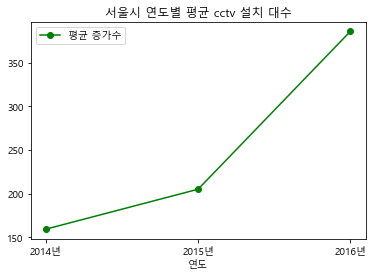

In [29]:
#  년도별 cctv 평균 설치 갯수 및 그래프

mean_14 = cctvArr['2014년'].mean()
mean_15 = cctvArr['2015년'].mean()
mean_16 = cctvArr['2016년'].mean()
dx = ['2014년','2015년','2016년']
dy = [mean_14,mean_15,mean_16]
plt.title('서울시 연도별 평균 cctv 설치 대수')
plt.xlabel('연도')
plt.plot(dx,dy,'g-o')
plt.legend(['평균 증가수'])
plt.show()

In [ ]:
# top5를 구하여라

In [87]:
a = np.argsort(cctvArr['소계'], axis=0)[:-6:-1]
print('기관명','소계',sep='\t')
print('='*15)
for i in cctvArr[a]:
    print(i[0],i[1],sep='\t')

기관명	소계
강남구	2780
양천구	2034
서초구	1930
은평구	1873
용산구	1624


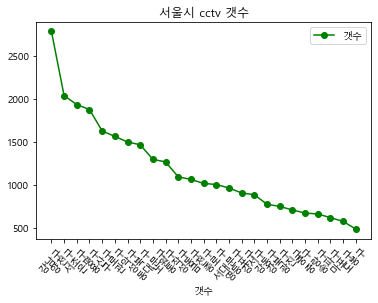

In [44]:
#갯수가 적은 순으로 표시
a= np.argsort(cctvArr['소계'], axis=0)[::-1]
dy = cctvArr[a]['소계']
dx = cctvArr[a]['기관명']
plt.xticks(rotation=48)
plt.title('서울시 cctv 갯수')
plt.xlabel('갯수')
plt.plot(dx,dy,'g-o')
plt.legend(['갯수'])
plt.show()

In [139]:
# 2016년 전년대비 증가율 알아보자!
c15 = cctvArr['2015년']
c16 = cctvArr['2016년']
(c16-c15)/c15*100
ratio = (c16-c15)/c15*100
ratio.round(2)

array([  59.59,  143.23,   47.83,  -55.98,   57.18,  228.3 ,   31.3 ,
         31.6 ,   14.41,  819.05,  192.42,  204.85,  124.26,  329.41,
         18.45,    9.96,  -43.33,  580.88, 1456.67,   91.28,  255.36,
         68.35,  198.58,  383.33,  -38.42])

In [148]:
print('기관명','2015년','2016년','증가율',sep='\t\t')
print('='*60)
for a,b,c,d in zip(cctvArr['기관명'],c15,c16,ratio.round(2)):
    print(f'{a:10}{b:10}{c:13}{d:>17},%')

기관명		2015년		2016년		증가율
강남구              584          932            59.59,%
강동구              155          377           143.23,%
강북구              138          204            47.83,%
강서구              184           81           -55.98,%
관악구              390          613            57.18,%
광진구               53          174            228.3,%
구로구              246          323             31.3,%
금천구              269          354             31.6,%
노원구              451          516            14.41,%
도봉구               42          386           819.05,%
동대문구             198          579           192.42,%
동작구              103          314           204.85,%
마포구              169          379           124.26,%
서대문구              68          292           329.41,%
서초구              336          398            18.45,%
성동구              241          265             9.96,%
성북구              360          204           -43.33,%
송파구               68          463           580.88,%
양천구               30   

In [155]:
r = np.sort(ratio.round(2))[:-6:-1]
r

array([1456.67,  819.05,  580.88,  383.33,  329.41])

In [157]:
for a,b in zip(cctvArr['기관명'],r):
    print(a,b)

#r과 기관명 매치시키는 방법을 모르겠음

강남구 1456.67
강동구 819.05
강북구 580.88
강서구 383.33
관악구 329.41


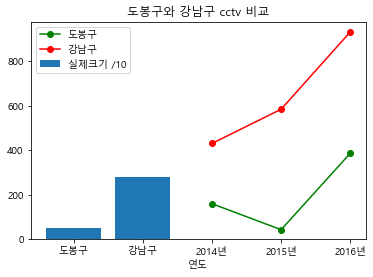

In [64]:
#도봉구와 강남구 cctv 비교

a= np.argsort(cctvArr['소계'], axis=0)
do_14 = cctvArr[a[0]]['2014년']
do_15 = cctvArr[a[0]]['2015년']
do_16 = cctvArr[a[0]]['2016년']
ga_14 = cctvArr[a[-1]]['2014년']
ga_15 = cctvArr[a[-1]]['2015년']
ga_16 = cctvArr[a[-1]]['2016년']
vy = [cctvArr[a[0]]['소계']/10,cctvArr[a[-1]]['소계']/10]
vx = ['도봉구','강남구']
dx = ['2014년','2015년','2016년']
dy = [do_14,do_15,do_16]
dy1 = [ga_14,ga_15,ga_16]
plt.title('도봉구와 강남구 cctv 비교')
plt.xlabel('연도')
plt.bar(vx, vy)
plt.plot(dx,dy,'g-o')
plt.plot(dx,dy1,'r-o')
plt.legend(['도봉구','강남구','실제크기 /10'])
plt.show()

In [88]:
# 복수개의 컬럼선택 참고
aa = cctvArr[['소계','2014년']]
np.array(aa.tolist()) 

array([[2780,  430],
       [ 773,   99],
       [ 748,  120],
       [ 884,  258],
       [1496,  260],
       [ 707,   78],
       [1561,  173],
       [1015,   51],
       [1265,   57],
       [ 485,  159],
       [1294,   23],
       [1091,  341],
       [ 574,  118],
       [ 962,   50],
       [1930,  157],
       [1062,   91],
       [1464,   78],
       [ 618,   21],
       [2034,  142],
       [ 904,  214],
       [1624,  218],
       [1873,  224],
       [1002,  314],
       [ 671,  190],
       [ 660,  121]])